In [ ]:
from sklearn import datasets

We import a simple dataset to perform linear regression.

In [ ]:
X,y = datasets.load_diabetes(return_X_y = True)
print(X.shape) #442 observations, 10 features
print(y[:5])

(442, 10)
[151.  75. 141. 206. 135.]


Standard train/test split and simple standard scaling.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 5)

# centering/scaling both features and response variables
scaler_feat = StandardScaler()
scaler_rv = StandardScaler()
scaler_feat.fit(X_train)
scaler_rv.fit(y_train.reshape(-1,1))
X_train_cr = scaler_feat.transform(X_train)
y_train_cr = scaler_rv.transform(y_train.reshape(-1,1))


Ready to perform linear regression.

In [ ]:
from sklearn import linear_model

lr = linear_model.Ridge(alpha = 1.0)  # alpha should be selected by cross validation
lr.fit(X_train_cr, y_train_cr)
y_hat = lr.predict(scaler_feat.transform(X_test))  # centered/scaled X_test as input!

How to check how well it worked?

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import math

y_test_cr = scaler_rv.transform(y_test.reshape(-1,1))

rmse = math.sqrt(mean_squared_error(y_hat, y_test_cr))
r2 = r2_score(y_test_cr, y_hat)
print('RMSE: {} - R2: {}'.format(rmse, r2))

RMSE: 0.7154038462159572 - R2: 0.5272441322602146


A plot might also be helpful:

Text(0, 0.5, 'actual')

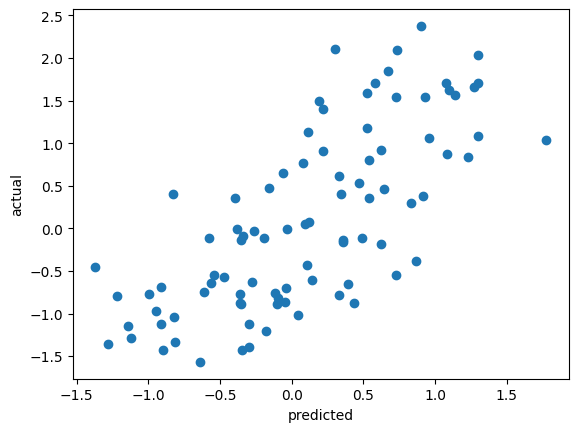

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_hat, y_test_cr)
plt.xlabel('predicted')
plt.ylabel('actual')